# Matplotlib to Plotly

- See original post at http://3leafnodes.com/plotly-getting-started.
- Note the interactive Plotly plots are not showing up on github but they can be found in the original post linked above. 
- Screenshots have been added in their place.

<IPython.core.display.Javascript object>


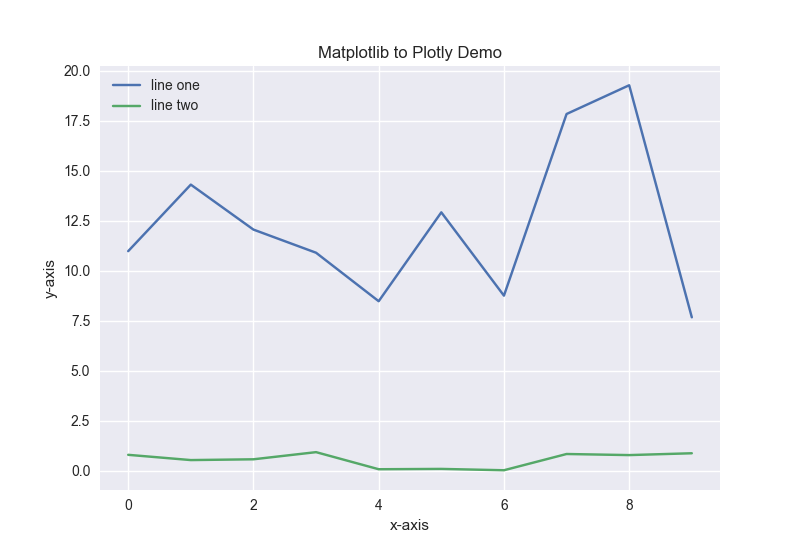

In [1]:
# Creating the Matplotlib plot
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
plt.style.use('seaborn')

fig = plt.figure()
np.random.seed(0)
plt.plot(np.random.rand(10)*20, label="line one")
plt.plot(np.random.rand(10), label="line two")
plt.title("Matplotlib to Plotly Demo")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.legend()

In [2]:
# Converting to Plotly
import plotly.plotly as py
import plotly.tools as tls

plotly_fig = tls.mpl_to_plotly(fig)
py.iplot(plotly_fig, filename='matplotlib-to-plotly')

/anaconda36/anaconda/lib/python3.6/site-packages/plotly/matplotlylib/renderer.py:384: UserWarning:

Bummer! Plotly can currently only draw Line2D objects from matplotlib that are in 'data' coordinates!

/anaconda36/anaconda/lib/python3.6/site-packages/plotly/matplotlylib/renderer.py:481: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.



![matplotlib-to-plotly](http://3leafnodes.com/assets/images/plotly/notebook/matplotlib-to-plotly.png)

# Example 1: Scatter and Line in 2D

In [3]:
def generate_dummy_data():
    from sklearn import linear_model, datasets
    n_samples = 100

    X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1,
                                          n_informative=1, noise=30,
                                          coef=True, random_state=0)
    return X,y

X,y = generate_dummy_data()

In [4]:
def fit_line_to_data(X,y):
    import numpy as np

    # reshape X to a 1D array
    X = X.reshape(1,-1)[0]

    # m is the gradient and c is the intercept in y=mx+c
    # the equation of a line.
    m,c = np.polyfit(X, y, 1)

    print("m = {}".format(m))
    print("c = {}".format(c))

    return m,c

m,c = fit_line_to_data(X,y)

m = 43.08728116246489
c = -2.442545481092182


In [5]:
def plot_data_and_best_fit():
    import plotly.plotly as py
    import plotly.graph_objs as go

    data = go.Scatter(
        x = X,
        y = y,
        opacity = 0.75,
        mode = 'markers',
        name = 'Dummy Data'
    )

    fit = go.Scatter(
        x = X,
        y = m*X+c,  # equation of a line
        opacity = 0.75,
        name = 'Line of Best Fit'
    )

    data = [data, fit]

    layout = go.Layout(
        title='Line of Best Fit Through Generated Dummy Data',
        xaxis=dict(
            title='X'
        ),
        yaxis=dict(
            title='y'
        )
    )

    fig = go.Figure(data=data, layout=layout)
    return py.iplot(fig, filename='dummy-data-demo')

plot_data_and_best_fit()

![linear-regression](http://3leafnodes.com/assets/images/plotly/notebook/linear-regression.png)

# Example 2: Scatter and Plane in 3D

In [6]:
def generate_data():
    import numpy as np
    from sklearn import linear_model, datasets

    n_samples = 100
    n_outliers = 1


    X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=2,
                                          n_informative=1, noise=100,
                                          coef=True, random_state=0)

    #Add outlier data
    np.random.seed(0)
    X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
    y[:n_outliers] = -3 + 9 * np.random.normal(size=n_outliers)

    return X,y

X,y = generate_data()

In [7]:
def train_model():
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

    linreg = LinearRegression()
    linreg.fit(X_train, y_train)

    print("y-intercept: {}".format(linreg.intercept_))
    print("coefficients: {}".format(linreg.coef_))

    return linreg

linreg = train_model()


y-intercept: -6.399996972084856
coefficients: [-41.31872872  93.14420684]


In [ ]:
def plot_3d_chart():

    import math
    import numpy as np

    # set up the meshgrid
    # floors and ceilings are taken because the range functions need
    # whole numbers
    # the ranges are taken from the data to make sure the grid covers
    # the values of the data
    x_min = math.floor(X[:,0].min())
    x_max = math.ceil(X[:,0].max())
    y_min = math.floor(X[:,1].min())
    y_max = math.ceil(X[:,1].max())
    x_,y_ = np.meshgrid(range(x_min,x_max), range(y_min,y_max))


    import plotly.plotly as py
    import plotly.graph_objs as go

    # for random color generation
    np.random.seed(10)
    color = np.random.randn(len(y))

    # the hypothesis function to generate the plane
    hypothesis = linreg.intercept_ + x_*linreg.coef_[0]  + y_*linreg.coef_[1]

    trace1 = go.Scatter3d(
        x=X[:,0],
        y=X[:,1],
        z=y,
        mode='markers',
        name='Dummy Data',
        marker=dict(
            size=20,
            color=color,               
            colorscale='Rainbow',   
            opacity=0.9
        )
    )

    trace2 = go.Surface(
            x = x_,
            y = y_,
            z = hypothesis,
            name='Plane of Best Fit',
            opacity = 0.7,
            colorscale='Greys',
            showscale= False
        )

    data = [trace1, trace2]
    layout = go.Layout(
            title='3D Plane of Best Fit Through Generated Dummy Data',
            margin=dict(
                l=0,
                r=0,
                b=10,
                t=100  # the title is obscured if the top margin is not adjusted
        )
    )
    fig = go.Figure(data=data, layout=layout)
    return py.iplot(fig, filename='3d-scatter-with-plane')

plot_3d_chart()

![3d-plane](http://3leafnodes.com/assets/images/plotly/notebook/3d-plane.png)